### **DIABETE**

### **LIBRERIE & IMPORT**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
# Funzione che serve ad effettuare la divisione tra train set e test set
from sklearn.model_selection import train_test_split
# Metriche per definire la qualità del modello generato
from sklearn.metrics import accuracy_score, mean_squared_error
# Per Scaling dei dati
from sklearn.preprocessing import StandardScaler
# Modello per la Regressione Lineare
from sklearn.linear_model import LinearRegression
# Neural Network Regression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

### **DATAFRAME DIABETE**

In [2]:
diabetes = load_diabetes()

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes["target"] = diabetes.target

display(df_diabetes.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### **VISUALIZZAZIONE DATI**

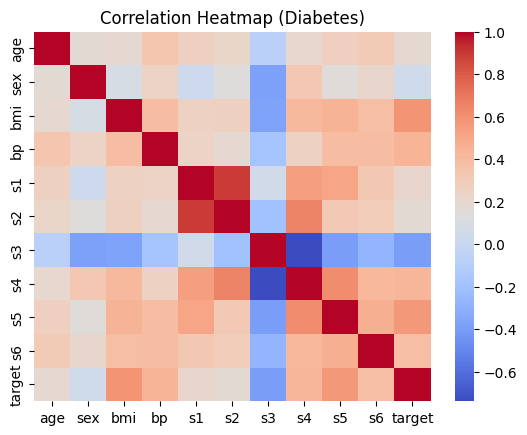

In [3]:
sns.heatmap(df_diabetes.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Diabetes)")
# E' la mappa che ci mostra la correlazione tra tutti i dati visualizzati
# Colori simili indicano una stretta correlazione, colori diversi una debole correlazione
plt.show()

RANDOM_SEED = 42

X = df_diabetes.drop("target", axis=1)
y = df_diabetes["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=RANDOM_SEED)

### **PROCESSING DEI DATI - SCALING**

In questo caso specifico il DATASET è già scalato, quindi possiamo evitare di scalare le X, ma potremmo considerare di scalare le y per migliorare la MSE

### **MEAN SQUARED ERROR**

In [7]:
regressors = {
    "Linera Regression": LinearRegression(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,50), max_iter=10000, random_state=42),
    "Decision Tree (4)": DecisionTreeRegressor(max_depth=4),
    "Decision Tree (10)": DecisionTreeRegressor(max_depth=10)
}

for name, models in regressors.items():
    models.fit(X_train, y_train)
    mlp = reg.regressor_.named_steps["mlp"]
    print("n_iter:", mlp.n_iter_)
    print("loss:", mlp.loss_)
    preds = models.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} MSE: {mse:.2f}")

n_iter: 586
loss: 0.24548393524126513
Linera Regression MSE: 2821.75
n_iter: 586
loss: 0.24548393524126513
Neural Network MSE: 2805.94
n_iter: 586
loss: 0.24548393524126513
Decision Tree (4) MSE: 3594.95
n_iter: 586
loss: 0.24548393524126513
Decision Tree (10) MSE: 5746.98


### **NEURAL NETWORK**

In [5]:
# Verifico se settando dei paramentri specifici posso abbassare la MSE
# Per individuare questi paramentri ho testato usando il playground di tensorflow

# Creo una pipe per gestire lo Scaling e il setting del Modello MLP
pipe = Pipeline([
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(100,50),
        learning_rate_init=0.0001, # Migliora
        alpha=1e-3, # Migliora
        max_iter=10000,
        random_state=42)
    )
])

# Scaliamo y_train e y_test (Migliora la MSE)
reg = TransformedTargetRegressor(
    regressor=pipe,
    transformer=StandardScaler()
)

# Addestro il modello sui dati y scalati MLP
reg.fit(X_train, np.asarray(y_train).ravel())
mlp = reg.regressor_.named_steps["mlp"]
print("n_iter:", mlp.n_iter_)
print("loss:", mlp.loss_)
# Valuta le predizioni
y_pred = reg.predict(X_test)

print("Neural Network MSE:", round(mean_squared_error(np.asarray(y_test).ravel(), y_pred),2))

n_iter: 586
loss: 0.24548393524126513
Neural Network MSE: 2746.59


Text(0.5, 1.0, 'bmi vs Target')

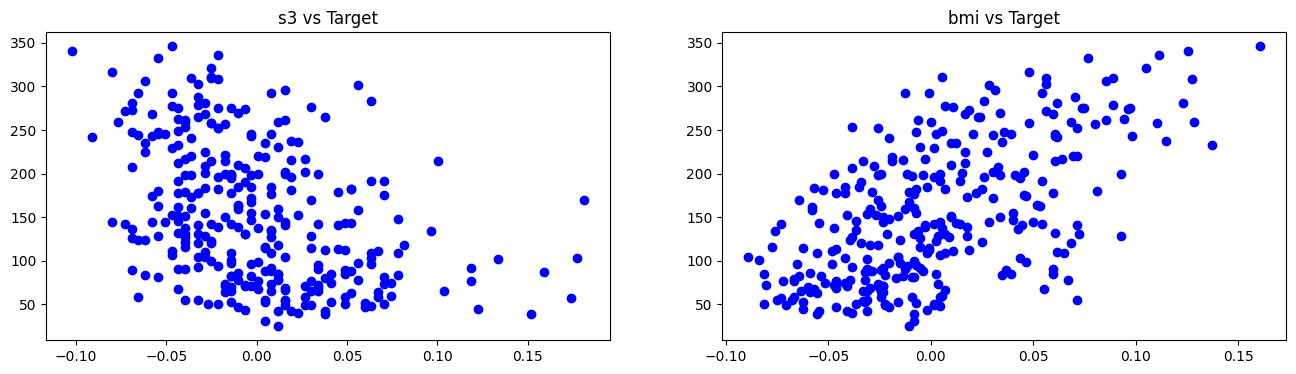

In [6]:
# Plottind Data

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
plt.plot(X_train["s3"], np.asarray(y_train).ravel(), 'bo')
plt.title("s3 vs Target")

plt.subplot(1,2,2)
plt.plot(X_train["bmi"], y_train, 'bo')
plt.title("bmi vs Target")

### **CONSIDERAZIONI**

Vedendo i vari risultati ottentui della MSE risulta che la **NEURAL NETWORK** è la più efficente (Dalle slide risulta la Linear Regression)  


Per ottimizzare ancora meglio la **NEURAL NETWORK MLP** ho scalato anche i dati (Train/Test y) utilizzando una Pipeline più TransformedTargetRegressor per rendere il tutto più compatto.


E' stato utile "giocare" con il setting dei parametri sul playground di Tensoflow per impostare apha => L2 e learning_rate_init = 0.0001


La scelta del numero dei Hidden Layer e dei vari valori  per la NN è stata ottenuta tramite varie iterazioni constatando che ottimizzavano il risultato iniziale (E' la forma minima? No, è la migliore che attualmente ho individuato!)